In [1]:
import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt 
import seaborn as sns

In [3]:
data = pd.read_csv(r"C:\Users\DELL\Downloads\survey_data (1).csv.crdownload")
print(data.head())

   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                 

In [5]:
duplicates = data.duplicated().sum()
print("Number of duplicate rows:", duplicates)

Number of duplicate rows: 0


In [7]:
data.drop_duplicates(inplace=True)
duplicate_count_after = data.duplicated().sum()
print("Number of duplicate rows after removal:", duplicate_count_after)

Number of duplicate rows after removal: 0


In [9]:
data['CodingActivities'].isna().sum()

479

In [11]:
data['CodingActivities'].fillna(method='ffill', inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_28536\1225017418.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['CodingActivities'].fillna(method='ffill', inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_28536\1225017418.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data['CodingActivities'].fillna(method='ffill', inplace=True)


In [13]:
data['CodingActivities'].isna().sum()

0

In [15]:
comp = [col for col in data.columns if 'Comp' in col or 'Salary' in col or 'Pay' in col]
print(f'compensation related columns:', comp)

compensation related columns: ['CompTotal', 'AIComplex', 'ConvertedCompYearly']


In [17]:
from sklearn.preprocessing import MinMaxScaler

In [19]:
scaler = MinMaxScaler()

In [23]:
data['ConvertedCompYearly_MinMax'] = scaler.fit_transform(data[['ConvertedCompYearly']])
print(data[['ConvertedCompYearly', 'ConvertedCompYearly_MinMax']].head())

   ConvertedCompYearly  ConvertedCompYearly_MinMax
0                  NaN                         NaN
1                  NaN                         NaN
2                  NaN                         NaN
3                  NaN                         NaN
4                  NaN                         NaN


In [25]:
print("Min value after scaling:", data['ConvertedCompYearly_MinMax'].min())
print("Max value after scaling:", data['ConvertedCompYearly_MinMax'].max())

Min value after scaling: 0.0
Max value after scaling: 1.0


In [29]:
from scipy.stats import zscore 
data['ConvertedCompYearly_zscore'] = zscore(data['ConvertedCompYearly'])
print(data[['ConvertedCompYearly', 'ConvertedCompYearly_zscore']].head())

   ConvertedCompYearly  ConvertedCompYearly_zscore
0                  NaN                         NaN
1                  NaN                         NaN
2                  NaN                         NaN
3                  NaN                         NaN
4                  NaN                         NaN


In [33]:
print("Mean after Z-score normalization:", data['ConvertedCompYearly_zscore'].mean())
print("Standard deviation after Z-score normalization:", data['ConvertedCompYearly_zscore'].std())

Mean after Z-score normalization: nan
Standard deviation after Z-score normalization: nan


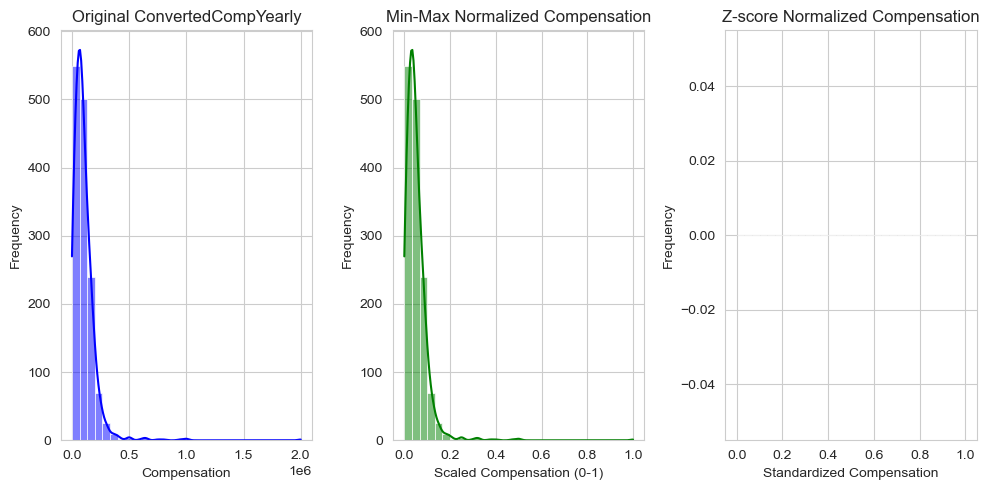

In [47]:
sns.set_style("whitegrid")
fig, axes = plt.subplots(1, 3, figsize=(10, 5))

#histogram for original compensation data
sns.histplot(data['ConvertedCompYearly'], bins=30, kde=True, ax=axes[0], color='blue')
axes[0].set_title('Original ConvertedCompYearly')
axes[0].set_xlabel('Compensation')
axes[0].set_ylabel('Frequency')

#histogram for Min-Max normalized data
sns.histplot(data['ConvertedCompYearly_MinMax'], bins=30, kde=True, ax=axes[1], color='green')
axes[1].set_title('Min-Max Normalized Compensation')
axes[1].set_xlabel('Scaled Compensation (0-1)')
axes[1].set_ylabel('Frequency')

#histogram for Z-score normalized data
sns.histplot(data['ConvertedCompYearly_zscore'], bins=30, kde=True, ax=axes[2], color='red')
axes[2].set_title('Z-score Normalized Compensation')
axes[2].set_xlabel('Standardized Compensation')
axes[2].set_ylabel('Frequency')
plt.tight_layout()
plt.show()